In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from numpy import exp, log
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import mannwhitneyu
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def regress(x,y):
    xdf  = pd.DataFrame({"X":x})
    X_const = sm.add_constant(xdf)
    res = sm.OLS(y, X_const).fit()
    slope = res.params["X"]
    slope_low = res.conf_int(alpha=0.05).T["X"][0]
    slope_hight = res.conf_int(alpha=0.05).T["X"][1]
    return slope, slope_low, slope_hight, res.rsquared

In [3]:
def Simulate_Normal(N, beta, sigma, topk):
    X = np.random.normal(100000, 10000, N)  # Generate X values from a normal distribution
    eps = np.random.normal(0, sigma, N)     # Generate noise for Y
    Y = X**beta * exp(eps)                  # Generate Y based on X and noise
    
    # Sort X and Y by Y values in descending order
    sorted_indices = np.argsort(-Y)  
    X_sorted = X[sorted_indices]
    Y_sorted = Y[sorted_indices]

    cumulative_sum_Y = np.cumsum(Y_sorted)
    total_sum_Y = np.sum(Y_sorted)
    
    topk_threshold = total_sum_Y * topk  #
    selected_idx = np.argmax(cumulative_sum_Y >= topk_threshold) + 1 
    
    X_hat = X_sorted[:selected_idx]
    Y_hat = Y_sorted[:selected_idx]
    return regress(log(X_hat),log(Y_hat))

In [4]:
Bs = np.array([5/6,7/6])
topks = np.array([0.5])
sigmas = np.array([0.05])
Ns = np.logspace(start = 1, stop = 8, num=8, dtype = int)
Ntrials = 50

In [5]:
df = pd.DataFrame(columns = ["Distribution","Beta","N","topk","sigma","B_hat","Bh_L","Bh_H","R2"])
for beta in Bs:
    for topk in topks:
        for sigma in sigmas:
            for N in Ns:
                print(N)
                for ntraisl in range(Ntrials):
                    B_hat, B_hat_low, B_hat_hight, R2 = Simulate_Normal(N, beta, sigma, topk)
                    df.loc[len(df.index)] = ['Normal', beta, N, topk, sigma, B_hat, B_hat_low, B_hat_hight, R2]

10
100
1000
10000
100000
1000000
10000000
100000000
10
100
1000
10000
100000
1000000
10000000
100000000


In [5]:
df.to_csv("Consistency_Results.csv")

NameError: name 'df' is not defined

### Plot

In [10]:
df = pd.read_csv("Consistency_Results.csv")
df["Error"] = df["B_hat"]-df["Beta"]
df[r"$\beta$"] = ""
df.loc[df["Beta"] == 5/6, r"$\beta$"] = '5/6'
df.loc[df["Beta"] == 7/6, r"$\beta$"] = '7/6'

In [11]:
plt.rcParams.update({'font.size' : 12})
# sns.set_theme(palette="tab10")

C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ip2347\anaconda3\envs\CUSP_DS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

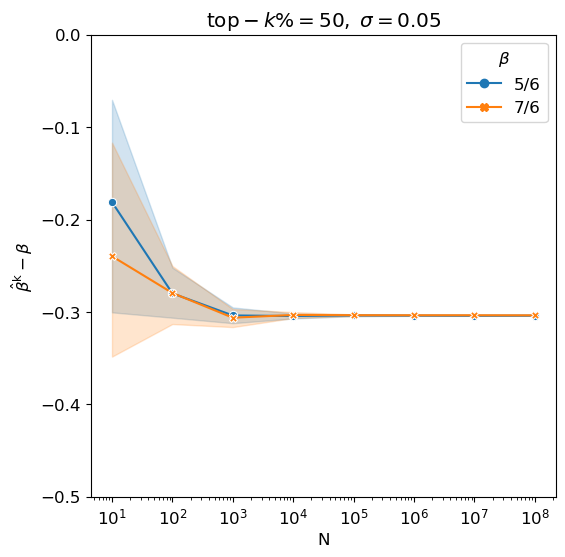

In [12]:
f, ax = plt.subplots(figsize=(6, 6))
ax.set(xscale="log")
sns.lineplot(data=df, x="N", ax=ax, y="Error", hue = r"$\beta$",
             style=r"$\beta$", markers=True, dashes=False);
ax.set_title(r"$\mathrm{top-}k\% = 50, \; \sigma = 0.05$")
ax.set_ylim([-0.5,0])
ax.set_ylabel(r"$\hat{\beta}^\mathrm{k}-\beta$");
plt.savefig("Consistency.pdf",bbox_inches="tight",transparent=True)
plt.show()